In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [19]:
device = ""
if torch.cuda.is_available(): device = "cuda"
else: device = "cpu"

print("device used :- "+device)

device used :- cuda


In [20]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train = torchvision.datasets.CIFAR10(root="./cifar10",train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train,batch_size=256,shuffle=True,num_workers = 4)

test = torchvision.datasets.CIFAR10(root="./cifar10",train=True,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test,batch_size=256,shuffle=False,num_workers = 4)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
class Cnn(nn.Module):
    def __init__(self,network = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,10))):
        super(Cnn, self).__init__()
        
        # 5 convolutional layers
        self.network = network
    def forward(self, x):
        x = self.network(x)
        return x

In [22]:
def adjust_learning_rate(optimizer, epoch):
    if epoch < 5: lr = 0.1
    elif epoch < 10: lr = 0.01
    else: lr = 0.001
    for param_group in optimizer.param_groups: 
        param_group['lr'] = lr
        
    return lr

In [23]:
def train(model,num_epochs,optimizer,criterion,adjustLr = True):
    # Train the model
    lost_lst = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs,labels) in enumerate(train_loader):
            inputs,labels = inputs.to(device),labels.to(device)
            optimizer.zero_grad()        
            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()    
            
            # Print statistics
            running_loss += loss.item()
            # if i % 200 == 199:    # Print every 200 mini-batches
        print('[%d] loss: %.3f' % (epoch + 1,running_loss / 200))
        lost_lst.append(running_loss/200)
                
    print('Finished training')
    return model,lost_lst

In [24]:
def plotGraph(x):
    s = len(x)
    x = np.asarray(x)
    y = np.arange(1,s+1)
    plt.xlabel("epoch number")
    plt.ylabel("Running Loss")   
    plt.plot(y,x)
    plt.show()

In [25]:
def test(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs,labels = inputs.to(device),labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    
    return 100*correct/total

[1] loss: 0.992
[2] loss: 0.981
Finished training
Accuracy of the network on the 10000 test images: 66 %


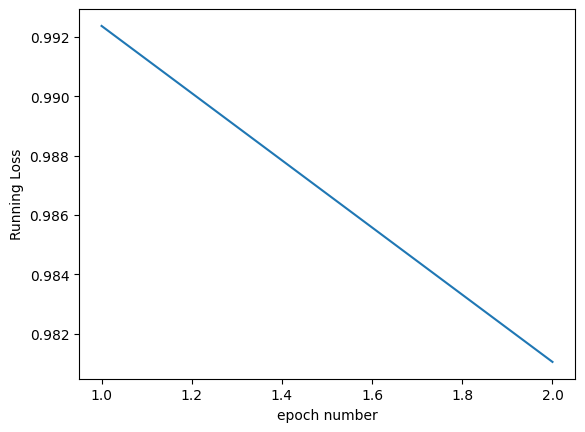

In [17]:
# Network 1
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,10))

model = Cnn(n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l)

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l)

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l)

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model6 = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.Sigmoid(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.Sigmoid(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.ReLU(),
    
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Tanh(),
    
    nn.Linear(128,64),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Sigmoid(),
    
    nn.Linear(128,64),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.ReLU(),
    
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Tanh(),
    
    nn.Linear(128,64),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Sigmoid(),
    
    nn.Linear(128,64),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.ReLU(),
    
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Tanh(),
    
    nn.Linear(128,64),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.Sigmoid(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Sigmoid(),
    
    nn.Linear(128,64),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.ReLU(),
    
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Tanh(),
    
    nn.Linear(128,64),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,64),
    nn.Sigmoid(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Sigmoid(),
    
    nn.Linear(128,64),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

In [ ]:
# AlexNet
n = nn.Sequential(
    nn.Conv2d(3,64,kernel_size=(11,11),stride=(4,4),padding=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Conv2d(64,192,kernel_size=(5,5),stride=(1,1),padding=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Conv2d(192,384,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Conv2d(384,256,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Conv2d(256,256,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Dropout(p = 0.5, inplace=False),
    nn.Linear(9216,4096,bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p = 0.5, inplace=False),
    nn.Linear(4096,1024,bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(1024,10,bias=True)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l)  

In [ ]:
# AlexNet
n = nn.Sequential(
    nn.Conv2d(3,64,kernel_size=(11,11),stride=(4,4),padding=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Conv2d(64,192,kernel_size=(5,5),stride=(1,1),padding=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Conv2d(192,384,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Conv2d(384,256,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Conv2d(256,256,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2,padding=0,dilation=1,ceil_mode=False),
    
    nn.Dropout(p = 0.5, inplace=False),
    nn.Linear(9216,4096,bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p = 0.5, inplace=False),
    nn.Linear(4096,1024,bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(1024,10,bias=True)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l)  